### Importing libraries

In [15]:
import seaborn as sns
import pandas as pd
import numpy as np
from geopy.distance import geodesic

### Loading data

In [4]:
df_fst = pd.read_csv('../tables/pairwise_fst_apriori')
order = ['MN_WI_ND','IA_NE','MO','KS_OK','AR','LA','IL_IN','MS','KY_TN', 'OH_WV','SC_NC','MI']
df_fst = df_fst.reindex(columns=order, index=order)
df_fst

,MN_WI_ND,IA_NE,MO,KS_OK,AR,LA,IL_IN,MS,KY_TN,OH_WV,SC_NC,MI
MN_WI_ND,NaN,0.0101,0.0473,0.0554,0.0666,0.0615,0.0606,0.0702,0.0579,0.0756,0.0902,0.0584
IA_NE,0.0101,NaN,0.0279,0.0361,0.0504,0.0432,0.0510,0.0576,0.0478,0.0605,0.0764,0.0401
MO,0.0473,0.0279,NaN,0.0077,0.0104,0.0161,0.0335,0.0406,0.0310,0.0430,0.0577,0.0296
KS_OK,0.0554,0.0361,0.0077,NaN,0.0056,0.0121,0.0365,0.0438,0.0316,0.0437,0.0584,0.0350
AR,0.0666,0.0504,0.0104,0.0056,NaN,0.0102,0.0387,0.0430,0.0316,0.0457,0.0571,0.0401
LA,0.0615,0.0432,0.0161,0.0121,0.0102,NaN,0.0213,0.0197,0.0131,0.0240,0.0385,0.0217
IL_IN,0.0606,0.0510,0.0335,0.0365,0.0387,0.0213,NaN,0.0300,0.0135,0.0356,0.0497,0.0142
MS,0.0702,0.0576,0.0406,0.0438,0.0430,0.0197,0.0300,NaN,0.0175,0.0398,0.0459,0.0361
KY_TN,0.0579,0.0478,0.0310,0.0316,0.0316,0.0131,0.0135,0.0175,NaN,0.0199,0.0349,0.0183
OH_WV,0.0756,0.0605,0.0430,0.0437,0.0457,0.0240,0.0356,0.0398,0.0199,NaN,0.0517,0.0310


### Getting pairwise geographic distance

Loading meta data

In [10]:
df_meta = pd.read_csv('../config/meta_apriori_jittered.csv')

Calculating average geographic location

In [12]:
def calculate_average_loc(group):
    return pd.Series({'latitude':group['latitude'].values.mean(), 
                      'longitude': group['longitude'].values.mean()})

average_pop_locations = df_meta.groupby('POP').apply(calculate_average_loc)
average_pop_locations

,latitude,longitude
POP,,
AR,34.866538,-92.966026
IA_NE,41.910990,-93.267224
IL_IN,38.731039,-87.185012
KS_OK,36.443812,-95.424977
KY_TN,37.171205,-85.125327
LA,30.827007,-91.746219
MI,43.264542,-84.296719
MN_WI_ND,45.930398,-91.970533
MO,37.737141,-91.437887


In [17]:
distances = pd.DataFrame(index=average_pop_locations.index, columns=average_pop_locations.index)

for i in average_pop_locations.index:
    for j in average_pop_locations.index:
        if i != j:
            coord1 = (average_pop_locations.loc[i, 'latitude'], average_pop_locations.loc[i, 'longitude'])
            coord2 = (average_pop_locations.loc[j, 'latitude'], average_pop_locations.loc[j, 'longitude'])
            distances.loc[i, j] = geodesic(coord1, coord2).kilometers
        else:
            distances.loc[i, j] = 0  # Distance to self is zero
distances

POP,AR,IA_NE,IL_IN,KS_OK,KY_TN,LA,MI,MN_WI_ND,MO,MS,OH_WV,SC_NC
POP,,,,,,,,,,,,
AR,0,782.404677,670.635946,283.190679,751.322665,462.303017,1195.297827,1231.437581,346.833225,428.340916,1080.712332,1327.910918
IA_NE,782.404677,0,625.772174,634.889595,874.986225,1237.444383,751.132132,458.562108,489.14132,1113.129347,976.492958,1516.447323
IL_IN,670.635946,625.772174,0,770.428358,250.478325,970.807206,558.950467,891.25743,388.305881,737.226206,438.60661,895.814924
KS_OK,283.190679,634.889595,770.428358,0,922.173054,710.198879,1214.876311,1092.399801,382.390342,711.516321,1207.825185,1548.222478
KY_TN,751.322665,874.986225,250.478325,922.173054,0,931.841577,680.253619,1127.059163,561.942496,665.784654,356.760208,659.241053
LA,462.303017,1237.444383,970.807206,710.198879,931.841577,0,1529.547898,1676.667415,767.051464,274.87878,1288.405628,1319.403798
MI,1195.297827,751.132132,558.950467,1214.876311,680.253619,1529.547898,0,677.082623,861.426004,1293.154376,463.678356,1070.513009
MN_WI_ND,1231.437581,458.562108,891.25743,1092.399801,1127.059163,1676.667415,677.082623,0,911.096049,1522.788726,1079.584054,1685.986204
MO,346.833225,489.14132,388.305881,382.390342,561.942496,767.051464,861.426004,911.096049,0,624.010307,826.453356,1212.681689


### Plotting heatmap

[Text(0, 0.5, 'MN_WI_ND'),
 Text(0, 1.5, 'IA_NE'),
 Text(0, 2.5, 'MO'),
 Text(0, 3.5, 'KS_OK'),
 Text(0, 4.5, 'AR'),
 Text(0, 5.5, 'LA'),
 Text(0, 6.5, 'IL_IN'),
 Text(0, 7.5, 'MS'),
 Text(0, 8.5, 'KY_TN'),
 Text(0, 9.5, 'OH_WV'),
 Text(0, 10.5, 'SC_NC'),
 Text(0, 11.5, 'MI')]

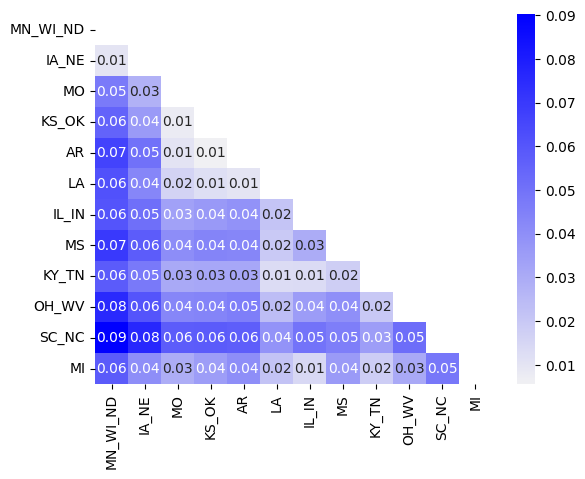

In [25]:
sns.heatmap(df_fst,
            annot=True, 
            fmt='.2f',
            cmap=sns.light_palette('blue',as_cmap=True),
           mask = np.triu(np.ones_like(df_fst)))
ax.collections[0].colorbar.set_label('$Pairwise \; F_{st}$', 
                                     fontdict = {
                                         'fontsize': 12,
                                         'fontname':'Arial'
    
})
ax.set_xticklabels(ax.get_xticklabels(), fontdict={'fontname': 'Arial'})
ax.set_yticklabels(ax.get_yticklabels(), fontdict={'fontname': 'Arial'})